# PART A - DOMAIN: Electronics and Telecommunication

1. Data import and Understanding 
A. Read the ‘Signals.csv’ as DataFrame and import required libraries.
B. Check for missing values and print percentage for each attribute.
C. Check for presence of duplicate records in the dataset and impute with appropriate method.
D. Visualise distribution of the target variable.
E. Share insights from the initial data analysis (at least 2).
2. Data preprocessing
A. Split the data into X & Y. 
B. Split the data into train & test with 70:30 proportion.
C. Print shape of all the 4 variables and verify if train and test data is in sync.
D. Normalise the train and test data with appropriate method.
E. Transform Labels into format acceptable by Neural Network
3. Model Training & Evaluation using Neural Network 
A. Design a Neural Network to train a classifier.
B. Train the classifier using previously designed Architecture
C. Plot 2 separate visuals. 
i. Training Loss and Validation Loss
ii. Training Accuracy and Validation Accuracy
D. Design new architecture/update existing architecture in attempt to improve the performance of the model.
E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

# 1. Data import and Understanding

A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [4]:
pip install --upgrade tensorflow

     |████████████████████████████████| 217.4 MB 9.4 kB/s eta 0:00:016  |▏                               | 952 kB 2.9 MB/s eta 0:01:15     |████▋                           | 31.6 MB 1.9 MB/s eta 0:01:36     |████████▉                       | 60.1 MB 3.3 MB/s eta 0:00:48     |█████████                       | 61.1 MB 3.6 MB/s eta 0:00:44     |██████████████                  | 95.7 MB 4.5 MB/s eta 0:00:28     |██████████████▍                 | 97.6 MB 4.6 MB/s eta 0:00:27     |██████████████▍                 | 97.9 MB 4.6 MB/s eta 0:00:27     |█████████████████               | 115.8 MB 4.4 MB/s eta 0:00:24     |███████████████████████████████▌| 214.4 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 3

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.0'

In [121]:
import numpy as np       # Library for number operations
import pandas as pd      # Library for data operations

import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler

In [122]:
# read csv file with ";" as seprators
signal_data=pd.read_csv("NN Project Data - Signal.csv")  

# Display top 5 rows of the dataset
signal_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


B. Check for missing values and print percentage for each attribute.

In [123]:
# Checking the presence of missing values
null_counts = signal_data.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


There are no null values in the data

C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [124]:
##Identify duplicates records in the data
dupes = signal_data.duplicated()
sum(dupes)

240

In [125]:
##here we can see that there are 240 duplicated rows. We want to remove the duplicate rows.

#Removing Duplicates
signal_data =signal_data.drop_duplicates()

In [126]:
#Now check the duplicate data again and you will see that there are no duplicate rows.
dupes = signal_data.duplicated()
sum(dupes)

0

D. Visualise distribution of the target variable.
E. Share insights from the initial data analysis (at least 2). 

In [127]:
# 5 point summary of numerical attributes
signal_data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/kabirmishra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


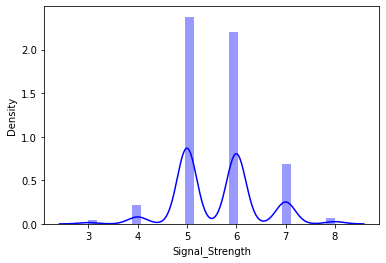

Distribution of  Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8235780017165619
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [128]:
cols = list(signal_data)
sns.distplot(signal_data[cols[11]], color='blue')
#plt.xlabel('Experience')
plt.show()
print('Distribution of ',cols[11])
print('Mean is:',signal_data[cols[11]].mean())
print('Median is:',signal_data[cols[11]].median())
print('Mode is:',signal_data[cols[11]].mode())
print('Standard deviation is:',signal_data[cols[11]].std())
print('Skewness is:',signal_data[cols[11]].skew())
print('Maximum is:',signal_data[cols[11]].max())
print('Minimum is:',signal_data[cols[11]].min())

'Signal_Strength' has classes as - 3.0, 4.0,5.0, 6.0, 7.0 and 8.0

/Users/kabirmishra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


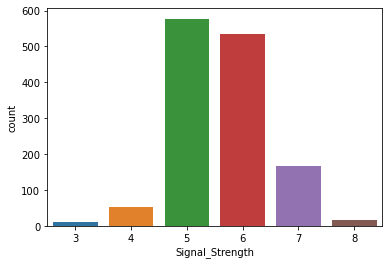

In [129]:
sns.countplot(signal_data['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

class 5.0 in 'Signal_Strength' has the highest count.

# 2. Data preprocessing

A. Split the data into X & Y. 

B. Split the data into train & test with 70:30 proportion.

C. Print shape of all the 4 variables and verify if train and test data is in sync. 

D. Normalise the train and test data with appropriate method.

E. Transform Labels into format acceptable by Neural Network

In [142]:
#Seperate independent variables and target variables
X = signal_data.drop("Signal_Strength", axis=1)
Y = signal_data['Signal_Strength']

B. Split the data into train & test with 70:30 proportion.

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=7)

In [144]:
x_val_train, x_val, y_val_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=7)

C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [145]:
x_train.shape

(951, 11)

In [146]:
y_train.shape

(951,)

In [147]:
x_test.shape

(408, 11)

In [148]:
y_test.shape

(408,)

Looking at the above we can say the train and the test data is in sync.

D. Normalise the train and test data with appropriate method.

In [149]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_val_train = sc.fit_transform(x_val_train)
x_val = sc.fit_transform(x_val)
x_test = sc.transform(x_test)

In [150]:
y_train = np.array(y_train)
y_val_train = np.array(y_val_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Question 3: Model Training & Evaluation using Neural Network:

A. Design a Neural Network to train a classifier.

In [151]:
classifier = Sequential()
classifier.add(BatchNormalization(input_shape=(11,)))
classifier.add(Dense(1))
sgd = optimizers.SGD(learning_rate = 0.001)
classifier.compile(optimizer=sgd, loss='mse',metrics=['accuracy'])
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


B. Train the classifier using previously designed Architecture & C. Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

In [152]:
model = classifier.fit(x=x_val_train, y=y_val_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 28.2615 - accuracy: 0.0000e+00 - val_loss: 21.9773 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 18.1881 - accuracy: 0.0000e+00 - val_loss: 13.6612 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 10.9774 - accuracy: 0.0000e+00 - val_loss: 7.9093 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 6.3900 - accuracy: 0.0000e+00 - val_loss: 4.5688 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 3.8637 - accuracy: 0.0000e+00 - val_loss: 2.9579 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 2.6890 - accuracy: 0.0000e+00 - val_loss: 2.2372 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 2.0527 - accuracy: 0.0000e+0

In [153]:
score = classifier.evaluate(x_val_train,y_val_train)
score

24/24 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.0000e+00


[0.451839804649353, 0.0]

In [154]:
score_t = classifier.evaluate(x_test,y_test)
score_t

13/13 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.0000e+00


[0.4565701186656952, 0.0]

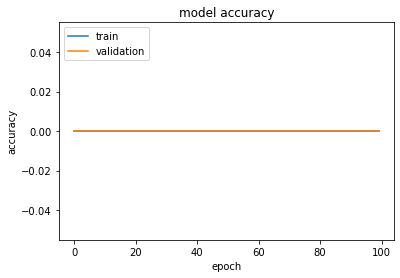

In [155]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

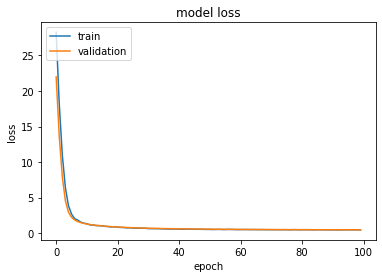

In [156]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# Question 2:

E. Transform Labels into format acceptable by Neural Network.

In [157]:
yc = to_categorical(Y)

D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [158]:
x_cat_train, x_cat_test, y_cat_train, y_cat_test = train_test_split(X, yc, test_size=.30, random_state=7)

In [159]:
x_cval_train, x_cval, y_cval_train, y_cval = train_test_split(x_cat_train, y_cat_train, test_size=.20, random_state=7)

In [160]:
classifier_opt = Sequential()
classifier_opt.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='random_normal'))
classifier_opt.add(Dense(activation = 'relu', units=6, kernel_initializer='random_normal')) 
classifier_opt.add(Dense(activation = 'softmax', units=9, kernel_initializer='random_normal'))
opt = optimizers.Adam(learning_rate = 0.01)
classifier_opt.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [161]:
mod_new = classifier_opt.fit(x_cval_train, y_cval_train,           
          validation_data=(x_cval,y_cval),
          epochs=100,
          batch_size=32)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.6334 - accuracy: 0.3947 - val_loss: 1.2526 - val_accuracy: 0.3560
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2732 - accuracy: 0.3974 - val_loss: 1.2212 - val_accuracy: 0.4398
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2376 - accuracy: 0.3921 - val_loss: 1.2010 - val_accuracy: 0.4398
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2210 - accuracy: 0.4382 - val_loss: 1.1902 - val_accuracy: 0.4398
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 1.2213 - accuracy: 0.4355 - val_loss: 1.1992 - val_accuracy: 0.4503
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2183 - accuracy: 0.4842 - val_loss: 1.1877 - val_accuracy: 0.4398
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2107 - accuracy: 0.4829 - val_loss: 1.1928 - val_accuracy: 0.4660
Epoch 8/100


In [162]:
score = classifier_opt.evaluate(x_cval_train, y_cval_train, verbose=0)
print(score)

[1.0130152702331543, 0.5855262875556946]


In [163]:
score_t = classifier_opt.evaluate(x_cat_test, y_cat_test, verbose=0)
print( score_t)

[1.0687837600708008, 0.5710784196853638]


E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

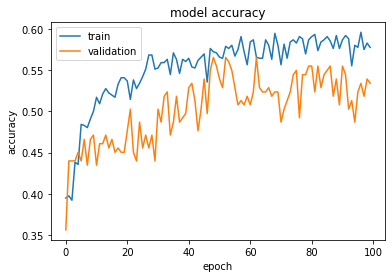

In [164]:
plt.plot(mod_new.history['accuracy'])
plt.plot(mod_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

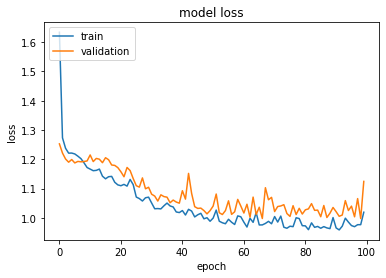

In [165]:
plt.plot(mod_new.history['loss'])
plt.plot(mod_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Looking at the accuracies when we can say that when we change the optimizier, added more layers and changed the loss function, the accuracy increases.

# PART B - DOMAIN: Autonomous Vehicles

# 1. Data Import and Exploration

A. Read the .h5 file and assign to a variable. 

B. Print all the keys from the .h5 file.

C. Split the data into X_train, X_test, Y_train, Y_test

In [91]:
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization

In [92]:
# Open the file as readonly
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Data pre-processing and visualisation

In [93]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# 2. Data Visualisation and preprocessing

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

B. Visualise first 10 images in train data and print its corresponding labels.

C. Reshape all the images with appropriate shape update the data in same variable.

D. Normalise the images i.e. Normalise the pixel values. 

E. Transform Labels into format acceptable by Neural Network 

F. Print total Number of classes in the Dataset. 

In [94]:
#Checking few contents of features and labels of one example from the images
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [95]:
y_train[:1]

array([2], dtype=uint8)

In [96]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [97]:
y_test[:1]

array([1], dtype=uint8)

Visualising the first 10 images in the dataset.

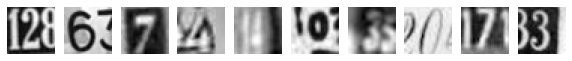

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [99]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Checking the shape of the data

In [100]:
X_train.shape

(42000, 32, 32)

In [101]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building.RESHAPE 2D - 32*32 into 1D - 1024.We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [102]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024) (42000,)
Resized Test set (18000, 1024) (18000,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [103]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


# 3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier. 

B. Train the classifier using previously designed Architecture (Use best suitable parameters).

C. Evaluate performance of the model with appropriate metrics. 

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [104]:
# define model


def nn_model():
    # create model
  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(BatchNormalization())                    
  model.add(Dense(64,activation='relu'))
  model.add(BatchNormalization())                    
  model.add(Dense(32,activation='relu'))
  model.add(BatchNormalization())                    
  model.add(Dense(num_classes,activation='softmax'))
  return model

In [105]:
# build the model
model = nn_model()

In [106]:
# Compile model
adam= optimizers.Adam(learning_rate =1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [107]:
# Fitting the model
training_history = model.fit(X_test,y_test, validation_data=(X_test,y_test),epochs=32,batch_size=300,verbose=2)

Epoch 1/32
60/60 - 3s - loss: 1.9823 - accuracy: 0.3256 - val_loss: 2.1741 - val_accuracy: 0.2636 - 3s/epoch - 43ms/step
Epoch 2/32
60/60 - 1s - loss: 1.3687 - accuracy: 0.5823 - val_loss: 1.8022 - val_accuracy: 0.4753 - 1s/epoch - 19ms/step
Epoch 3/32
60/60 - 1s - loss: 1.0929 - accuracy: 0.6692 - val_loss: 1.3386 - val_accuracy: 0.6343 - 1s/epoch - 20ms/step
Epoch 4/32
60/60 - 1s - loss: 0.9443 - accuracy: 0.7085 - val_loss: 1.0376 - val_accuracy: 0.7129 - 1s/epoch - 23ms/step
Epoch 5/32
60/60 - 1s - loss: 0.8303 - accuracy: 0.7424 - val_loss: 0.8552 - val_accuracy: 0.7499 - 1s/epoch - 24ms/step
Epoch 6/32
60/60 - 1s - loss: 0.7676 - accuracy: 0.7588 - val_loss: 0.7756 - val_accuracy: 0.7650 - 1s/epoch - 20ms/step
Epoch 7/32
60/60 - 1s - loss: 0.7088 - accuracy: 0.7794 - val_loss: 0.6547 - val_accuracy: 0.7971 - 1s/epoch - 18ms/step
Epoch 8/32
60/60 - 1s - loss: 0.6496 - accuracy: 0.7970 - val_loss: 0.6338 - val_accuracy: 0.8002 - 1s/epoch - 21ms/step
Epoch 9/32
60/60 - 2s - loss: 0.

In [108]:
scores= model.evaluate(X_test,y_test,verbose=0)
print("Error:%.2f%%" %(100-scores[1]*100))
model.summary()

Error:6.18%
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                          

In [109]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.20140865445137024
Accuracy: 0.9382222294807434


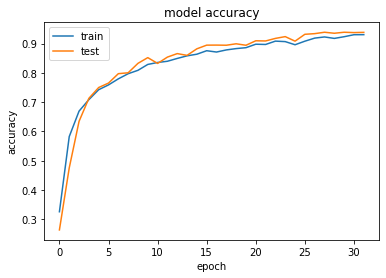

In [110]:
#summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

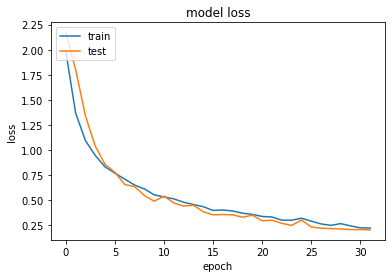

In [111]:
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

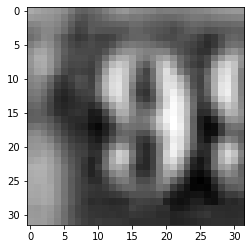

In [112]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32), cmap = 'gray')

In [113]:
#Predicting the digits
print('Label: ', np.argmax(model.predict(X_test)[5]))

Label:  9


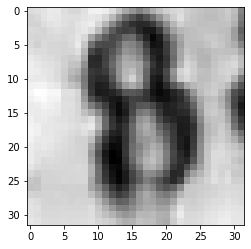

In [114]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32), cmap = 'gray')

In [115]:
#Predicting the digits
print('Label: ', np.argmax(model.predict(X_test)[10]))

Label:  8


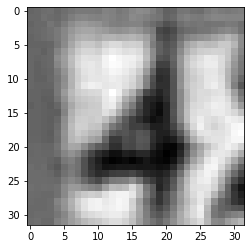

In [116]:
#Showing the image
plt.imshow(X_test[41].reshape(32,32), cmap = 'gray')

In [117]:
#Predicting the digits
print('Label: ', np.argmax(model.predict(X_test)[41]))

Label:  4


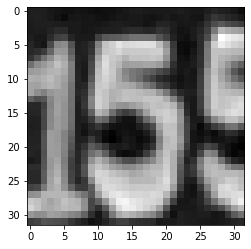

In [118]:
#Showing the image
plt.imshow(X_test[201].reshape(32,32), cmap = 'gray')

In [119]:
#Predicting the digits
print('Label: ', np.argmax(model.predict(X_test)[201]))

Label:  5


# Model Accuracy is 94 %